In [ ]:
"""
Link to original notebook:
https://github.com/cschlosberg/codergirl-python/
blob/master/Fashion-CNN-Clean.ipynb

(DataCamp tutorial:
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

Convolutional Neural Networks in Python with Keras
"""

In [1]:
from keras.datasets import fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print("Training data shape: ", train_X.shape, train_Y.shape)
print("Testing data shape: ", test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

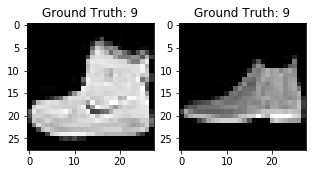

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

In [5]:
# Preprocess the data
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Change the data type fron int8
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [7]:
# One-hot encoding: convert categorical data into a vector of numbers
train_Y_oneHot = to_categorical(train_Y)
test_Y_oneHot = to_categorical(test_Y)

print('Original label: ', train_Y[0])
print('After conversion to one-hot: ', train_Y_oneHot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# partition the training and testing data
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_oneHot,
                                                        test_size=0.2, random_state=13)

In [9]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
# model the data
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
# train the network for 20 epochs
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [13]:
# use the Adam optimizer and compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [17]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [18]:
# train the model (one epoch for simplicity)
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,
                                  epochs=1, verbose=1, validation_data=(valid_X,
                                                                            valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2810 - accuracy: 0.8977 - val_loss: 0.2866 - val_accuracy: 0.8975


In [19]:
# evaluate the model on the test set
test_eval = fashion_model.evaluate(test_X, test_Y_oneHot, verbose=0)

In [20]:
print("Test loss: ", test_eval[0])
print("Test accuracy: ", test_eval[1])

Test loss:  0.3013392131328583
Test accuracy:  0.8920999765396118


In [ ]:
# plot the accuracy and loss between training and validation data
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The above code, run with 20 epochs instead of 1, should look somewhat like this:</br>
Accuracy: http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512485101/output_56_0_st6ods.png
Loss: http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512485101/output_56_1_ie0rbw.png

<i>The section on adding dropout to reduce overfitting has been skipped for time. Review through the above links.</i>

In [29]:
# predict labels
predicted_classes = fashion_model.predict(test_X)

In [30]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [31]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 8854 correct labels


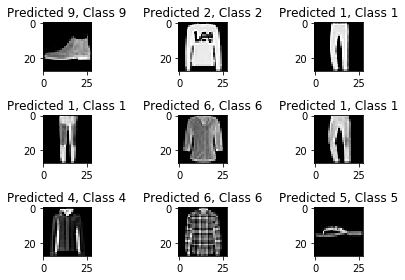

In [32]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1146 incorrect labels


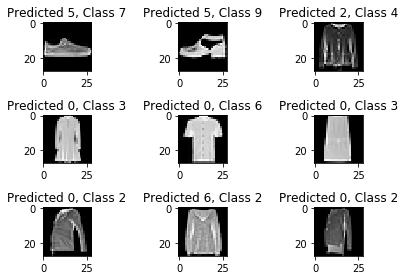

In [34]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [35]:
# create a classification report to identify misclassified objects in more detail
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.69      0.90      0.78      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.80      0.88      0.84      1000
     Class 3       0.91      0.88      0.90      1000
     Class 4       0.80      0.85      0.83      1000
     Class 5       0.95      0.98      0.97      1000
     Class 6       0.88      0.51      0.64      1000
     Class 7       0.98      0.90      0.94      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000

